In [1]:
!pip install jupyter pandas seaborn pillow networkx nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [2]:
from time import time
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import json
import re
import unicodedata
from collections import Counter

Mounted at /content/drive



Cargo los datos a un data frame desde Google Drive, en este caso, discursos electorales de candidatos

In [38]:
sheet_id = '14siRRHRzERxaOfl-e36tcHZWLq8uD7Bk-X9buTDho54' #Sacado del link del Share
sheet_name = 'Hoja1'  #Están en la Hoja 1

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

df = pd.read_csv(url)

df.head(1)

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020","Macon, Georgia",Campaign Speech


In [7]:
df.isna().sum()

,0
speaker,3
title,0
text,65
date,0
location,18
type,21


In [8]:
lista_speakers = df['speaker'].unique().tolist()
lista_speakers

['David Perdue',
 'Joe Biden',
 'Donald Trump',
 'Mike Pence',
 'Lindsey Graham, Jaime Harrison',
 'Joe Biden,Kamala Harris',
 'Kamala Harris, Mike Pence',
 'Michelle Obama',
 'Bernie Sanders',
 'Barack Obama',
 'Kamala Harris',
 'Donald Trump, Joe Biden',
 'Jill Biden',
 'Cindy McCain',
 'Pete Buttigieg',
 'Multiple Speakers',
 'Ivanka Trump',
 'Tom Cotton',
 'Rudy Giuliani',
 'Ben Carson',
 'Mitch McConnell',
 'Chen Guangcheng',
 'Lara Trump',
 'Lou Holtz',
 'Karen Pence',
 'Jack Brewer',
 'Kellyanne Conway',
 'Kayleigh McEnany',
 'Dan Crenshaw',
 'Pam Bondi',
 'Melania Trump',
 'Mike Pompeo',
 'Eric Trump',
 'Nicholas Sandmann',
 'Tiffany Trump',
 'Rand Paul',
 'Tim Scott',
 'Kimberly Guilfoyle',
 'Herschel Walker',
 'Donald Trump Jr.',
 'Nikki Haley',
 'Jim Jordan',
 'Michael Bloomberg',
 'Sarah Cooper',
 'Cory Booker',
 'Gavin Newsom',
 'Andrew Yang',
 nan,
 'Elizabeth Warren',
 'Hillary Clinton',
 'Nancy Pelosi',
 'Colin Powell',
 'Alexandria Ocasio-Cortez',
 'Bill Clinton',
 'Ch

In [9]:
lista_type = df['location'].unique().tolist()
lista_type

['Macon, Georgia',
 'Southfield ,Michigan',
 'Fort Myers, Florida',
 'ABC',
 'NBC',
 'Greenville, North Carolina ',
 'Miami, Florida',
 'Des Moines, Iowa',
 'Grand Rapids, Michigan',
 'Miramar, Florida ',
 'Johnstown, Pennsylvania',
 'Pembroke Pines, Florida',
 'Waukesha, Wisconsin',
 'Sanford, Florida',
 'Cincinnati, Ohio',
 'Toledo, Ohio',
 'Columbus, Ohio',
 'Erie, Pennsylvania',
 'Las Vegas, Nevada',
 'White House',
 'Spartanburg, South Carolina',
 'Fox News',
 'Phoenix, Arizona',
 'Boulder City, Nevada',
 'Virtual',
 'Salt Lake City,Utah',
 'Gettysburg, Pennsylvania',
 'Ann Arbor, Michigan',
 'Columbia, South Carolina',
 'Lebanon, New Hampshire',
 'Carter Lake, Iowa',
 'Duluth, Minnesota',
 'Greensburg, Pennsylvania',
 'Alliance, Ohio',
 'Cleveland, Ohio',
 'Raleigh, North Carolina',
 'Middletown, Pennsylvania',
 'Wilmington, Deleware',
 'Newport News, Virginia',
 'Atlanta, Georgia',
 'Doral, Florida',
 'Jacksonville, Florida',
 'Washington, D.C',
 'Charlotte, North Carolina',
 'P

In [10]:
pd.set_option('display.max_rows', None)
#print(df["type"])
pd.set_option('display.max_rows', None)
#print(df["location"])

In [13]:
#Copiar el df para modificarlo
df_expandidos = df.copy()

#Convertir los textos de la columna speaker en listas, separando por comas
df_expandidos['speaker'] = df_expandidos['speaker'].str.split(',')

#Crear una fila nueva para cada elemento de la lista en la columna speaker
df_expandidos = df_expandidos.explode('speaker')

#Eliminar espacios al inicio y final
df_expandidos['speaker'] = df_expandidos['speaker'].str.strip()

#Contar la cantidad de veces que aparece el speaker y ordenar los 5 primeros
conteo_expandidos = df_expandidos['speaker'].value_counts()
top5_speakers = conteo_expandidos.head(5)
df_top5 = df_expandidos[df_expandidos['speaker'].isin(top5_speakers.index)].copy()
print('Los candidatos con mayor cantidad de discursos se muestran en la tabla siguiente')
top5_speakers

Los candidatos con mayor cantidad de discursos se muestran en la tabla siguiente


,count
speaker,
Joe Biden,81
Donald Trump,54
Mike Pence,20
Bernie Sanders,17
Kamala Harris,16


In [12]:
# Contar valores vacíos o nulos en la columna 'text' por speaker
conteo_vacios = df_top5[df_top5['text'].isna() | (df_top5['text'].str.strip() == '')] \
    .groupby('speaker').size().sort_values(ascending=False)

print(conteo_vacios)

speaker
Donald Trump      35
Joe Biden         14
Kamala Harris      2
Bernie Sanders     1
Mike Pence         1
dtype: int64


In [14]:
# Total de discursos por speaker
total_discursos = df_top5.groupby('speaker').size()

# Vacíos por speaker
vacios_por_speaker = df_top5[df_top5['text'].isna() | (df_top5['text'].str.strip() == '')] \
    .groupby('speaker').size()

# Calcular porcentaje de vacíos
porcentaje_vacios = (vacios_por_speaker / total_discursos * 100).fillna(0).sort_values(ascending=False)

print(porcentaje_vacios)


speaker
Donald Trump      64.814815
Joe Biden         17.283951
Kamala Harris     12.500000
Bernie Sanders     5.882353
Mike Pence         5.000000
dtype: float64


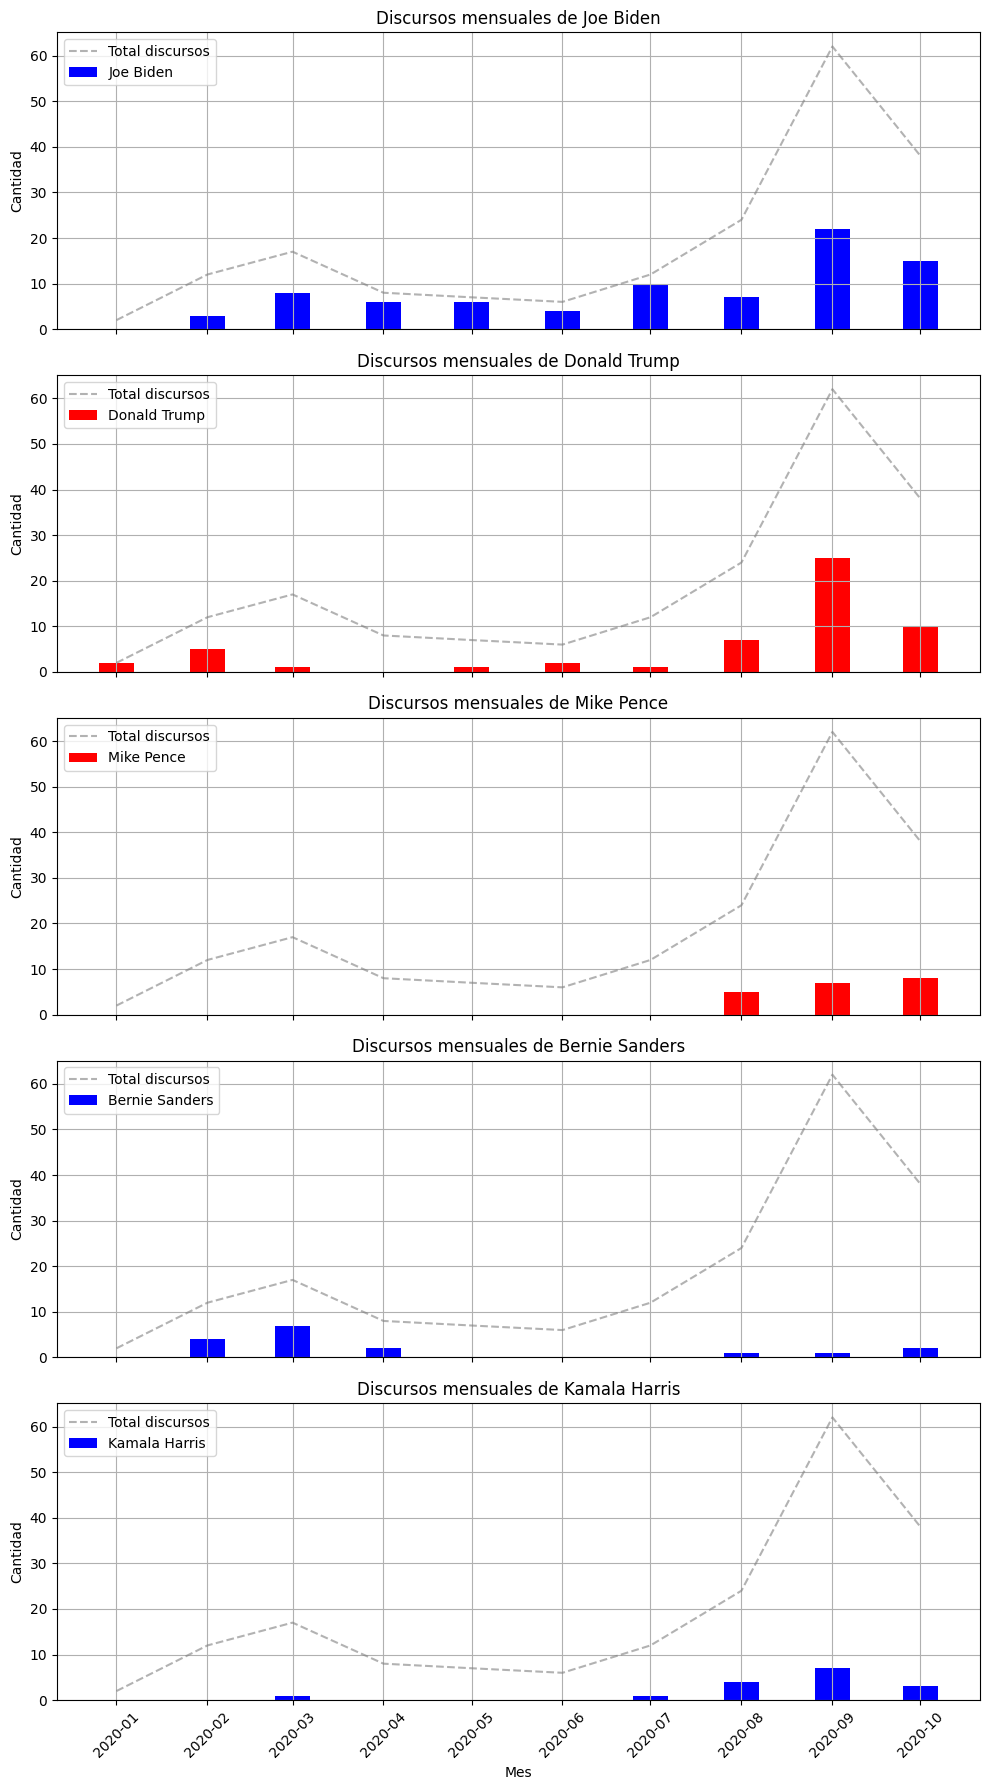

In [36]:
# Asegurarse de que 'date' esté en formato datetime y extraer el mes
df_expandidos['date'] = pd.to_datetime(df_expandidos['date'])
df_expandidos['month'] = df_expandidos['date'].dt.to_period('M').dt.to_timestamp()

# Obtener nombres del top 5 desde el índice de top5_speakers
top5_nombres = top5_speakers.index.tolist()

# Filtrar el DataFrame para esos 5 candidatos
df_top5 = df_expandidos[df_expandidos['speaker'].isin(top5_nombres)]

# Crear rango completo de meses
todos_los_meses = pd.date_range(start=df_top5['month'].min(),
                                end=df_top5['month'].max(),
                                freq='MS')

# Calcular el total de discursos por mes (entre todos los candidatos top 5)
total_mensual = df_top5.groupby('month').size().reindex(todos_los_meses, fill_value=0)

# Colores según partido (rojo republicano y azul demócrata)
colores_partido = {
    'Donald Trump': 'red',
    'Mike Pence': 'red',
    'Kamala Harris': 'blue',
    'Joe Biden': 'blue',
    'Bernie Sanders': 'blue'
}

# Crear figura y subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 18), sharex=True)

for i, speaker in enumerate(top5_nombres):
    datos_speaker = df_top5[df_top5['speaker'] == speaker]
    conteo_mensual = datos_speaker.groupby('month').size()
    conteo_completo = conteo_mensual.reindex(todos_los_meses, fill_value=0)

    color = colores_partido.get(speaker, 'gray')

    axes[i].bar(conteo_completo.index, conteo_completo.values, width=12, label=speaker, color=color)
    axes[i].plot(total_mensual.index, total_mensual.values, linestyle='--', color='gray', alpha=0.6, label='Total discursos')

    axes[i].set_title(f'Discursos mensuales de {speaker}')
    axes[i].set_ylabel('Cantidad')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].set_xlabel('Mes')
plt.tight_layout()
plt.show()

In [37]:
# Función para extraer solo el texto del orador principal
def extraer_texto_speaker(texto_completo, nombre_objetivo):
    if not isinstance(texto_completo, str) or not texto_completo:
        return ''

    patron = re.compile(r'([^\n:]+): \(\d{2}:\d{2}\)\n(.*?)(?=\n[^\n:]+: \(\d{2}:\d{2}\)|$)', re.DOTALL)
    fragmentos_filtrados = []
    for match in patron.finditer(texto_completo):
        speaker, contenido = match.groups()
        speaker = speaker.strip()
        if speaker == nombre_objetivo:
            fragmentos_filtrados.append(contenido.strip())

    return '\n'.join(fragmentos_filtrados)

# Función para limpieza de texto
def limpiar_texto_robusto(texto):
    if not isinstance(texto, str):
        return ''

    # Convertir a minúsculas
    texto = texto.lower()

    # Normalizar caracteres
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

    # Eliminar puntuación y caracteres especiales
    texto = re.sub(r'[^a-z\s]', ' ', texto)

    # Eliminar múltiples espacios
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

# Función para aplicar las operaciones de filtrado y limpieza a cada fila del DataFrame
def obtener_texto_filtrado(row):
    texto = row['text']
    speaker = row['speaker']

    if not texto or not speaker:
        return ''  # Si no hay texto o orador, devolver cadena vacía

    # Aplicar extracción y limpieza
    texto_filtrado = extraer_texto_speaker(texto, speaker)
    texto_limpio = limpiar_texto_robusto(texto_filtrado)

    return texto_limpio

# Aplicar la función a todas las filas del DataFrame y crear la columna 'clean_text'
df_top5['clean_text'] = df_top5.apply(obtener_texto_filtrado, axis=1)

print(df_top5[['speaker', 'clean_text']].head())


        speaker                                         clean_text
1     Joe Biden  hello michigan hi how are you whats your name ...
2  Donald Trump                                                   
3     Joe Biden                                                   
4  Donald Trump                                                   
5  Donald Trump                                                   


<ipython-input-37-d2d6c830d070>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['clean_text'] = df_top5.apply(obtener_texto_filtrado, axis=1)


In [21]:
# Función para contar las palabras más frecuentes por orador
def contar_palabras_por_orador(df_top5):
    conteo_palabras_por_orador = {}

    # Agrupar por 'speaker' para trabajar por orador
    for speaker in df_top5['speaker'].unique():
        # Filtrar los textos del orador
        textos_orador = df_top5[df_top5['speaker'] == speaker]['clean_text']

        # Unir todos los textos del orador en uno solo
        texto_unido = ' '.join(textos_orador)

        # Separar el texto en palabras
        palabras = texto_unido.split()

        # Contar la frecuencia de cada palabra
        contador_palabras = Counter(palabras)

        # Guardar el conteo para ese orador
        conteo_palabras_por_orador[speaker] = contador_palabras

    return conteo_palabras_por_orador

# Aplicar la función para obtener el conteo de palabras por orador
conteo_palabras_orador = contar_palabras_por_orador(df_top5)

# Mostrar las 5 palabras más frecuentes por orador
for speaker, contador in conteo_palabras_orador.items():
    print(f"\nOrador: {speaker}")
    palabras_frecuentes = contador.most_common(5)

    for palabra, frecuencia in palabras_frecuentes:
        print(f"  - {palabra}: {frecuencia} veces")



Orador: Joe Biden
  - the: 8726 veces
  - to: 7065 veces
  - and: 5937 veces
  - a: 3835 veces
  - of: 3810 veces

Orador: Donald Trump
  - the: 2478 veces
  - and: 2023 veces
  - to: 1916 veces
  - i: 1434 veces
  - a: 1426 veces

Orador: Mike Pence
  - the: 2554 veces
  - and: 2049 veces
  - to: 1690 veces
  - of: 1372 veces
  - in: 1167 veces

Orador: Kamala Harris
  - the: 1125 veces
  - and: 881 veces
  - to: 826 veces
  - of: 662 veces
  - that: 516 veces

Orador: Bernie Sanders
  - the: 1889 veces
  - to: 1354 veces
  - and: 1312 veces
  - of: 1064 veces
  - that: 1015 veces


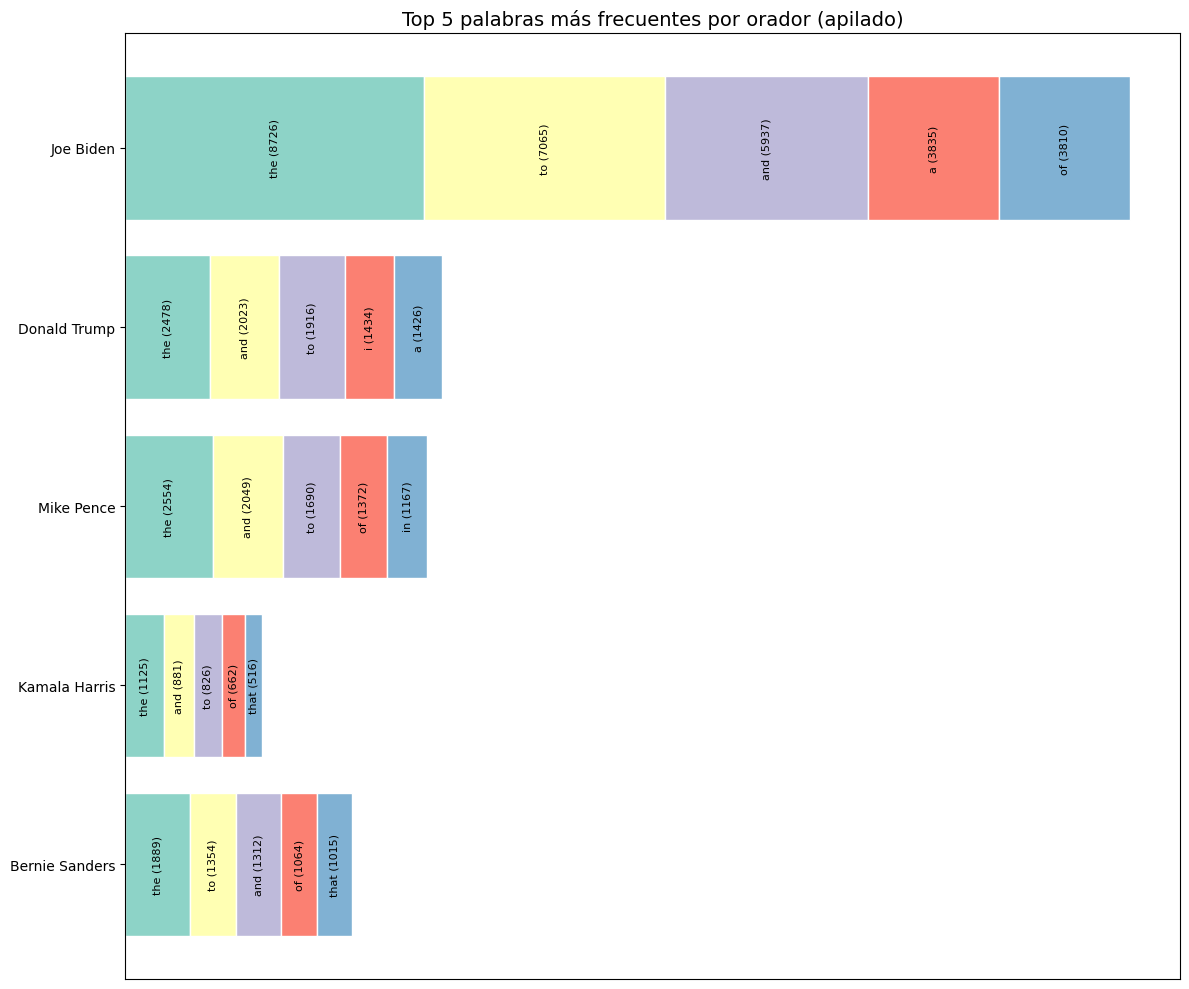

In [35]:
# Preparar datos
top_n = 5
datos = []

for speaker, contador in conteo_palabras_orador.items():
    for palabra, frecuencia in contador.most_common(top_n):
        datos.append({'orador': speaker, 'palabra': palabra, 'frecuencia': frecuencia})

df_plot = pd.DataFrame(datos)

# Crear figura
fig, ax = plt.subplots(figsize=(12, 2 * len(df_plot['orador'].unique())))
colors = sns.color_palette("Set3", top_n)

# Gráfico de barras modificado
for i, speaker in enumerate(df_plot['orador'].unique()):
    df_speaker = df_plot[df_plot['orador'] == speaker]
    left = 0
    for j, row in df_speaker.iterrows():
        frec = row['frecuencia']
        palabra = row['palabra']
        texto = f"{palabra} ({frec})"  # Texto con la frecuencia entre paréntesis

        ax.barh(y=i, width=frec, left=left, color=colors[j % top_n], edgecolor='white')

        # Mostrar palabra dentro de la barra rotada verticalmente
        ax.text(
            x=left + frec / 2,
            y=i,
            s=texto,
            va='center',
            ha='center',
            rotation=90,
            fontsize=8,
            color='black'
        )
        left += frec


ax.set_yticks(range(len(df_plot['orador'].unique())))
ax.set_yticklabels(df_plot['orador'].unique())
ax.set_xticks([])
ax.set_xlabel("")
ax.set_title(f"Top {top_n} palabras más frecuentes por orador (apilado)", fontsize=14)
ax.invert_yaxis()

plt.tight_layout()
plt.show()


In [25]:
temas = {
    'COVID': [
        'covid', 'coronavirus', 'pandemic', 'vaccine', 'vaccination', 'mask',
        'quarantine', 'lockdown', 'health crisis'
    ],
    'economy': [
        'economy', 'jobs', 'employment', 'tax',
        'unemployment', 'business', 'market'
    ],
    'racial_justice': [
        'race', 'racism', 'racial', 'justice', 'equality', 'black lives matter',
        'blm', 'discrimination', 'civil rights', 'protest'
    ],
    'healthcare': [
        'healthcare', 'insurance', 'obamacare', 'medicare',
        'hospital', 'doctor', 'patient', 'public option'
    ],
    'climate_change': [
        'climate', 'environment', 'global warming', 'pollution',
        'green energy', 'renewable', 'sustainability'
    ],
    'immigration': [
        'immigration', 'border', 'wall', 'deportation',
        'visa', 'migrant', 'undocumented'
    ],
    'public_safety': [
        'police', 'crime', 'violence', 'gun', 'shooting', 'safety'
    ],
    'foreign_policy': [
        'china', 'russia', 'iran', 'north korea', 'allies', 'nato',
        'trade war', 'treaty'
    ],
    'civil_rights': [
        'equal rights',
        'lgbtq', 'women rights', 'freedom','gay marriage', 'trans rights',
        'gender equality'
    ],
    'education': [
        'education', 'school', 'student', 'college', 'university',
        'tuition', 'remote learning'
    ]
}

# Diccionario para guardar los resultados
conteo_temas = {}

for speaker in df_top5['speaker'].unique():

    textos = df_top5[df_top5['speaker'] == speaker]['clean_text']
    texto_unido = ' '.join(textos)
    temas_candidato = {}

    # Contar por tema
    for tema, palabras_clave in temas.items():
        count = sum(texto_unido.count(palabra) for palabra in palabras_clave)
        temas_candidato[tema] = count

    # Guardar resultados
    conteo_temas[speaker] = temas_candidato


In [26]:
for speaker, temas_contados in conteo_temas.items():
    print(f'\nTemas más mencionados por {speaker}:')
    for tema, conteo in temas_contados.items():
        print(f'{tema}: {conteo}')


Temas más mencionados por Joe Biden:
COVID: 595
economy: 994
racial_justice: 254
healthcare: 372
climate_change: 138
immigration: 126
public_safety: 165
foreign_policy: 124
civil_rights: 13
education: 505

Temas más mencionados por Donald Trump:
COVID: 57
economy: 249
racial_justice: 108
healthcare: 81
climate_change: 18
immigration: 136
public_safety: 98
foreign_policy: 138
civil_rights: 14
education: 69

Temas más mencionados por Mike Pence:
COVID: 87
economy: 377
racial_justice: 70
healthcare: 76
climate_change: 14
immigration: 50
public_safety: 70
foreign_policy: 123
civil_rights: 119
education: 60

Temas más mencionados por Kamala Harris:
COVID: 51
economy: 85
racial_justice: 134
healthcare: 29
climate_change: 8
immigration: 1
public_safety: 25
foreign_policy: 17
civil_rights: 3
education: 66

Temas más mencionados por Bernie Sanders:
COVID: 78
economy: 157
racial_justice: 70
healthcare: 195
climate_change: 31
immigration: 63
public_safety: 38
foreign_policy: 32
civil_rights: 2
e

In [27]:
# Convertir el diccionario a un DataFrame
df_conteo_temas = pd.DataFrame.from_dict(conteo_temas, orient='index')

# Mostrar el DataFrame
df_conteo_temas

,COVID,economy,racial_justice,healthcare,climate_change,immigration,public_safety,foreign_policy,civil_rights,education
Joe Biden,595,994,254,372,138,126,165,124,13,505
Donald Trump,57,249,108,81,18,136,98,138,14,69
Mike Pence,87,377,70,76,14,50,70,123,119,60
Kamala Harris,51,85,134,29,8,1,25,17,3,66
Bernie Sanders,78,157,70,195,31,63,38,32,2,139


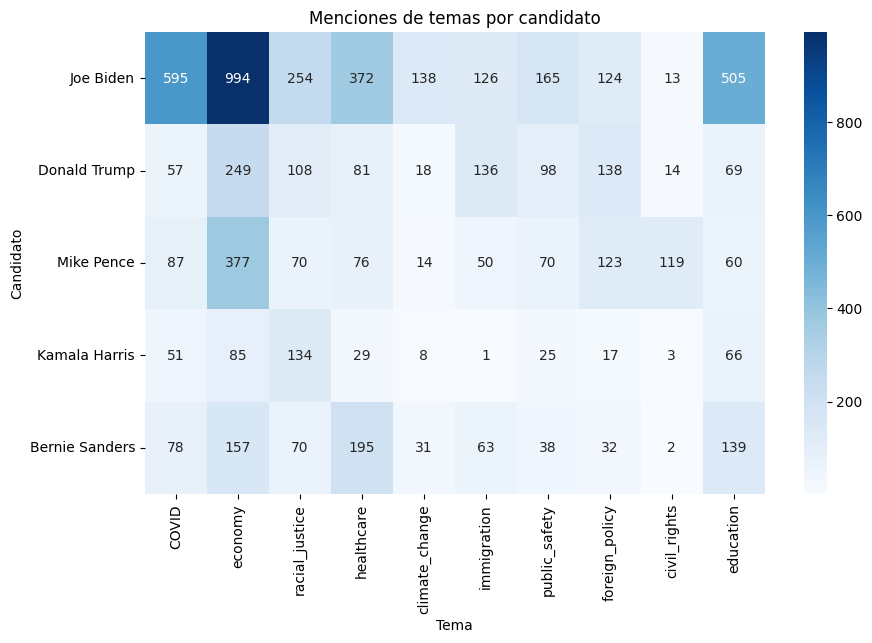

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_conteo_temas, annot=True, cmap='Blues', fmt='d')
plt.title('Menciones de temas por candidato')
plt.ylabel('Candidato')
plt.xlabel('Tema')
plt.show()


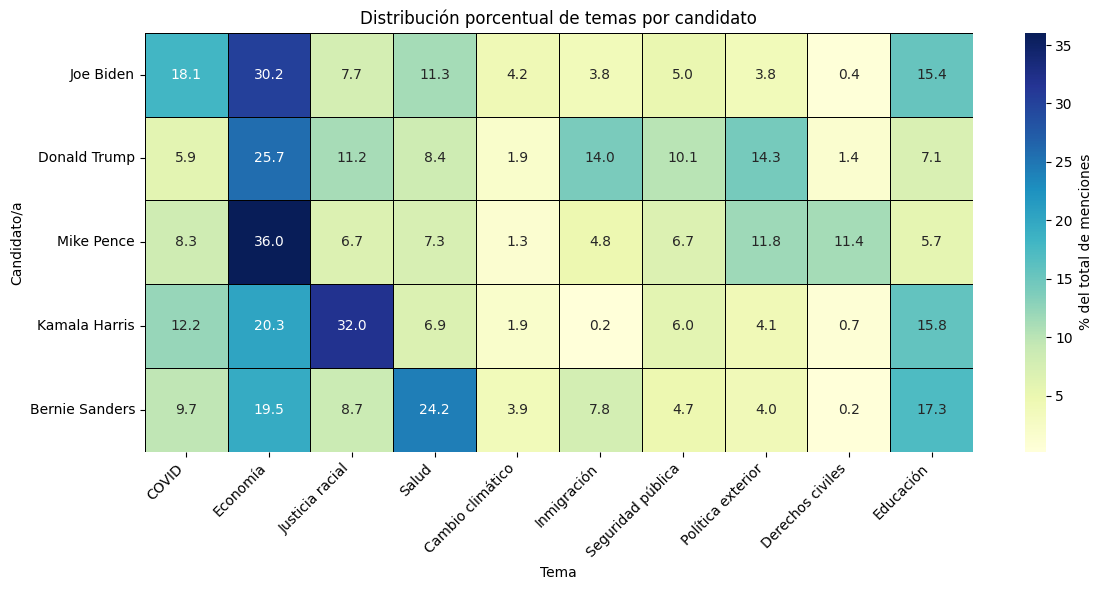

In [30]:
# Traduccion de los temas para no alterar el código de más arriba
traducciones_temas = {
    'covid': 'Covid',
    'economy': 'Economía',
    'racial_justice': 'Justicia racial',
    'healthcare': 'Salud',
    'climate_change': 'Cambio climático',
    'immigration': 'Inmigración',
    'public_safety': 'Seguridad pública',
    'foreign_policy': 'Política exterior',
    'supreme_court': 'Corte Suprema',
    'civil_rights': 'Derechos civiles',
    'education': 'Educación'
}
# Calcular el total de menciones por candidato
totales = df_conteo_temas.sum(axis=1)

# Calcular porcentajes por tema
df_porcentajes = df_conteo_temas.div(totales, axis=0) * 100
df_porcentajes.rename(columns=traducciones_temas, inplace=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_porcentajes, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': '% del total de menciones'},
    linewidths=0.5,           # Grosor de los bordes
    linecolor='black'     # Color de los bordes
)
plt.title('Distribución porcentual de temas por candidato')
plt.ylabel('Candidato/a')
plt.xlabel('Tema')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# Calcular la cantidad total de palabras por candidato
total_palabras = {}

for candidato in df_top5['speaker'].unique():
    textos = df_top5[df_top5['speaker'] == candidato]['clean_text']
    cantidad = textos.str.split().explode().count()
    total_palabras[candidato] = cantidad

# Mostrar
total_palabras

{'Joe Biden': np.int64(188132),
 'Donald Trump': np.int64(66389),
 'Mike Pence': np.int64(50244),
 'Kamala Harris': np.int64(23435),
 'Bernie Sanders': np.int64(40070)}

In [33]:
# Calcular la cantidad total de palabras y cantidad de discursos válidos por candidato
promedio_palabras = {}

for candidato in df_top5['speaker'].unique():
    textos = df_top5[(df_top5['speaker'] == candidato) & (df_top5['clean_text'].notna())]['clean_text']
    cantidad_palabras = textos.str.split().explode().count()
    cantidad_discursos = textos.shape[0]

    if cantidad_discursos > 0:
        promedio = cantidad_palabras / cantidad_discursos
    else:
        promedio = 0

    promedio_palabras[candidato] = promedio

# Mostrar el resultado
promedio_palabras


{'Joe Biden': np.float64(2322.617283950617),
 'Donald Trump': np.float64(1229.4259259259259),
 'Mike Pence': np.float64(2512.2),
 'Kamala Harris': np.float64(1464.6875),
 'Bernie Sanders': np.float64(2357.0588235294117)}

In [32]:
candidatos = ['Joe Biden', 'Donald Trump', 'Bernie Sanders', 'Kamala Harris', 'Mike Pence']
candidatos_mencionados = ['biden', 'trump', 'sanders', 'harris', 'pence']

mapeo_mencionado_a_formato = dict(zip(candidatos_mencionados, candidatos))

# Crear matriz vacía
matriz_menciones = pd.DataFrame(
    0,
    index=candidatos,
    columns=candidatos
)

# Función para contar menciones de un nombre en un texto
def contar_menciones(texto, nombre):
    if not isinstance(texto, str):
        return 0
    return texto.lower().count(nombre.lower())

# Recorrer el DataFrame de discursos
for idx, row in df_top5.iterrows():
    quien_habla = row['speaker']

    # Asegurarse de que quien habla esté en la lista de interés
    if quien_habla in candidatos:
        for mencionado_min in candidatos_mencionados:
            mencionado_formato = mapeo_mencionado_a_formato[mencionado_min]

            # Evitar que se cuente a sí mismo
            if quien_habla != mencionado_formato:
                cantidad = contar_menciones(row['clean_text'], mencionado_min)
                matriz_menciones.loc[quien_habla, mencionado_formato] += cantidad

print(matriz_menciones)

                Joe Biden  Donald Trump  Bernie Sanders  Kamala Harris  \
Joe Biden               0           420               8             23   
Donald Trump          110             0               7              4   
Bernie Sanders         61           127               0              1   
Kamala Harris          35            36               0              0   
Mike Pence            249           312               5             41   

                Mike Pence  
Joe Biden                3  
Donald Trump             2  
Bernie Sanders           0  
Kamala Harris            4  
Mike Pence               0  
